In [33]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, mean_absolute_error, mean_squared_error,
                             classification_report)
from sklearn.model_selection import cross_val_predict, KFold

import numpy as np
import seaborn as sns
import pandas as pd

digits = load_digits(as_frame=True)

# **Primera Parte**

Procedemos a separar una tercera parte de los datos para servirlos a la hora de predecir los modelos mas tarde

In [34]:
X_train, x_test, Y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

## **Regresión Logística**

In [35]:
model_regresionLogistica = LogisticRegression(max_iter=10000)

### Entrenamiento y predicción de resultados

In [36]:
model_regresionLogistica.fit(X_train, Y_train)
logisticaY_pred = model_regresionLogistica.predict(x_test)

### Resultados del modelo

<Axes: >

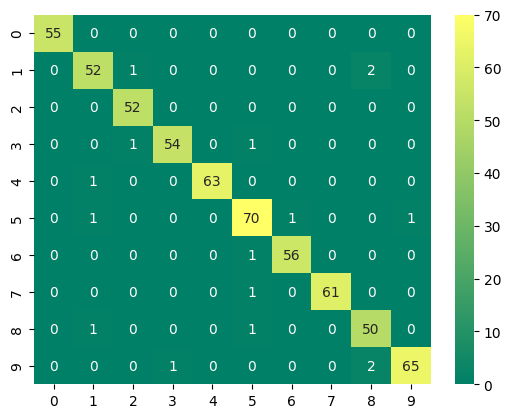

In [37]:
sns.heatmap(confusion_matrix(y_test, logisticaY_pred), annot=True, cmap="summer")

In [38]:
print("Classification report: \n", classification_report(y_test, logisticaY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.95      0.95        55
           2       0.96      1.00      0.98        52
           3       0.98      0.96      0.97        56
           4       1.00      0.98      0.99        64
           5       0.95      0.96      0.95        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.93      0.96      0.94        52
           9       0.98      0.96      0.97        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



- Puede que tenga una precisión alta debido a que el dataset tiene un valor lineal. 
- Al ser con poca resolución, hay menos variabilidad ya que partimos de menos pixeles de información, lo que ayuda a diferenciar mejor
- Las reglas de aprendizaje son sencillas

## **Perceptro**

In [39]:
from sklearn.linear_model import Perceptron

In [40]:
model_perceptron = Perceptron(random_state=42)

### Entrenamiento y predicción de los resultados

In [41]:
model_perceptron.fit(X_train, Y_train)
perc_yPred = model_perceptron.predict(x_test)

### Resultados del modelo

<Axes: >

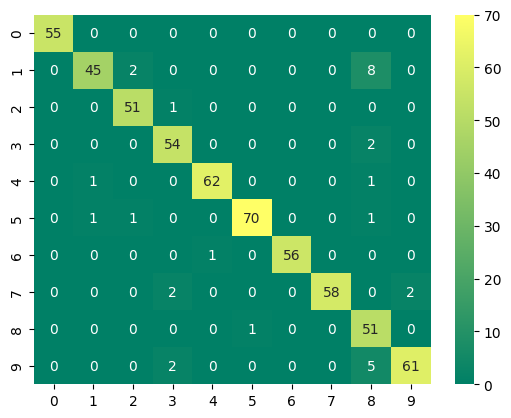

In [42]:
sns.heatmap(confusion_matrix(y_test, perc_yPred), annot=True, cmap="summer")

Como podemos observar, vemos que el modelo ha tenido dificultades confundiendo el 9 y el 1 en varias ocasiones con el 8.

A pesar de ello, vemos unos resultados constantes y no muy alarmantes.

In [43]:
print("Classification report: \n", classification_report(y_test, perc_yPred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.96      0.82      0.88        55
           2       0.94      0.98      0.96        52
           3       0.92      0.96      0.94        56
           4       0.98      0.97      0.98        64
           5       0.99      0.96      0.97        73
           6       1.00      0.98      0.99        57
           7       1.00      0.94      0.97        62
           8       0.75      0.98      0.85        52
           9       0.97      0.90      0.93        68

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594



Podemos confirmar lo que estabamos diciendo anteriormente. Debido a estos fallos, el 8 ha tenido una precisión del **75%**

Aún así, la media global del modelo es bastante alta, con un **95%** de precisión

## **Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model_decisionTree = DecisionTreeClassifier(random_state=42)

### Entrenamiento y predicción de los resultados

In [46]:
model_decisionTree.fit(X_train, Y_train)
decisionTree_ypred = model_decisionTree.predict(x_test)

### Resultados del modelo

<Axes: >

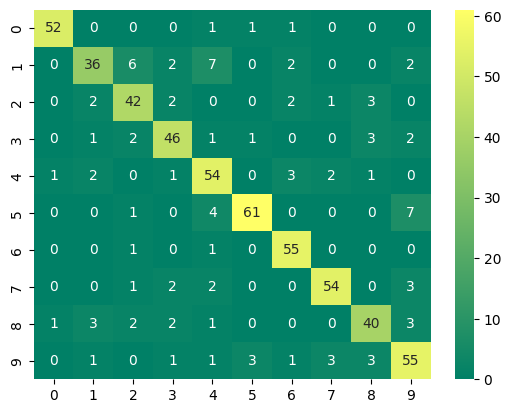

In [47]:
sns.heatmap(confusion_matrix(y_test, decisionTree_ypred), annot=True, cmap="summer")

En este modelo, podemos observar números más repartidos. Por ejemplo, destacamos el número 1, con el que ha confundido bastante con números como el 2, el 3 y el 4. También, les pasa lo mismo al 5, al 8 y al 9

Como podemos observar, este modelo no parece ser una buena opción

In [48]:
print("Classification report: \n", classification_report(y_test, decisionTree_ypred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.80      0.65      0.72        55
           2       0.76      0.81      0.79        52
           3       0.82      0.82      0.82        56
           4       0.75      0.84      0.79        64
           5       0.92      0.84      0.88        73
           6       0.86      0.96      0.91        57
           7       0.90      0.87      0.89        62
           8       0.80      0.77      0.78        52
           9       0.76      0.81      0.79        68

    accuracy                           0.83       594
   macro avg       0.83      0.83      0.83       594
weighted avg       0.84      0.83      0.83       594



Gracias a estos datos, podemos confirmar lo dicho anteriormente. El número 1 es el que sale peor parado, con un **65%** de **recall**. Por otro lado, gracias a que el 9 tiene un número de muestras más elevado, su porcentaje ha sido menor **(81%)**.

La media de todos los resultados deja una precisión del **83%** para el **Decision Tree**, mucho más bajo a lo visto anteriormente.

## **Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_randomForest = RandomForestClassifier(random_state = 42)

### Entreno y predicción de resultado

In [51]:
model_randomForest.fit(X_train, Y_train)
randomForest_ypred = model_randomForest.predict(x_test)

### Resultados del modelo

<Axes: >

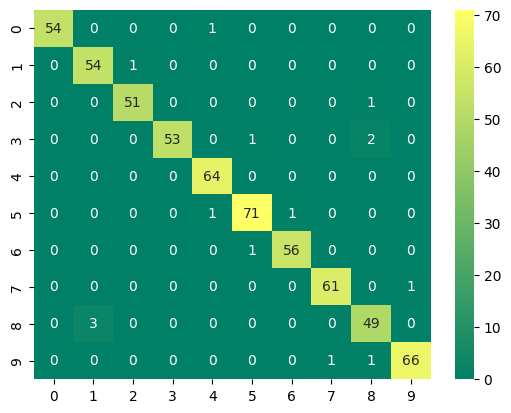

In [52]:
sns.heatmap(confusion_matrix(y_test, randomForest_ypred), annot=True, cmap="summer")

En este caso, vemos como los resultados de este modelo son estables, sin ninguna confusión destacable

In [53]:
print("Classification report: \n", classification_report(y_test, randomForest_ypred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.95      0.98      0.96        55
           2       0.98      0.98      0.98        52
           3       1.00      0.95      0.97        56
           4       0.97      1.00      0.98        64
           5       0.97      0.97      0.97        73
           6       0.98      0.98      0.98        57
           7       0.98      0.98      0.98        62
           8       0.92      0.94      0.93        52
           9       0.99      0.97      0.98        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.98      0.97      0.97       594



Se observa que el **Random Forest** tiene una precisión del **97%**

## **Comparativa Modelos**

In [54]:
comparativa = pd.DataFrame({
    'Nombre': ['Regresión Lineal', 'Perceptron', 'Decision Tree', 'Random Forest'],
    'Precision': [round(precision_score(y_test, logisticaY_pred, average='weighted'), 3), round(precision_score(y_test, perc_yPred, average='weighted'), 3), round(precision_score(y_test, decisionTree_ypred, average='weighted'), 3), round(precision_score(logisticaY_pred, randomForest_ypred, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, logisticaY_pred, average="weighted"), 3), round(recall_score(y_test, perc_yPred, average="weighted"), 3), round(recall_score(y_test, decisionTree_ypred, average="weighted"), 3), round(recall_score(logisticaY_pred, randomForest_ypred, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, logisticaY_pred, average="weighted"), 3), round(f1_score(y_test, perc_yPred, average="weighted"), 3), round(f1_score(y_test, decisionTree_ypred, average="weighted"), 3), round(f1_score(logisticaY_pred, randomForest_ypred, average="weighted"), 3)],
    'Score': [round(accuracy_score(y_test, logisticaY_pred), 3), round(accuracy_score(y_test, perc_yPred), 3), round(accuracy_score(y_test, decisionTree_ypred), 3), round(accuracy_score(logisticaY_pred, randomForest_ypred), 3)]
})

comparativa.sort_values(by="Precision", ascending=False)

,Nombre,Precision,Recall,F1,Score
0,Regresión Lineal,0.973,0.973,0.973,0.973
3,Random Forest,0.973,0.973,0.973,0.973
1,Perceptron,0.954,0.948,0.949,0.948
2,Decision Tree,0.836,0.833,0.833,0.833


Viendo los resultados, podemos confirmar que el **peor** modelo con este tipo de dataset es el **Decision Tree** con un **83.6%** alejandose considerablemente de los demás. Puede que un sobreajuste del árbol haya llevado a esta precisión "baja". Por otro lado, podemos observar que los modelos más adecuados para este dataset son los **lineales**, como la **Regresión lineal (97.3%) y el Perceptron (95.4%)**.

También destaca el **Random Forest** con un **97.3%**. Pese a ser parecido al Decision Tree, vemos que se envuelve mejor debido a que sabe controlar mejor los sobreajustes.

# **Segunda Parte**

En la segunda fase, evaluaremos si hay disparidades utilizando un conjunto nuevo de datos UCI, mediante el entrenamiento con la base de datos previamente utilizada de sklearn. A parte, se hará comparación también con el mejor modelo escogido por el cross validation.

In [92]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 


X_uci = optical_recognition_of_handwritten_digits.data.features
y_uci = optical_recognition_of_handwritten_digits.data.targets["class"].values

X_uci.columns = x_test.columns

kf = KFold(n_splits=5, shuffle=True, random_state=42)


## **Regresión Logística**

### Prediccion de resultados

In [81]:
uciLogY_pred = model_regresionLogistica.predict(X_uci)

### Resultados de modelos

<Axes: >

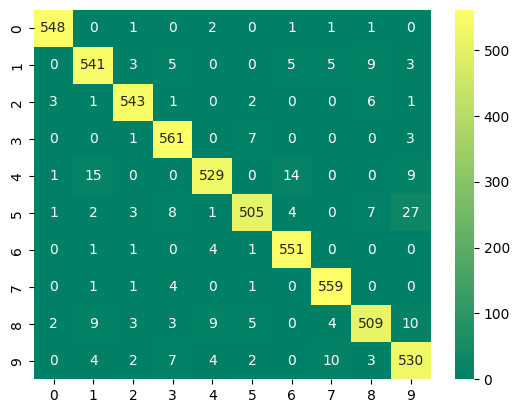

In [82]:
sns.heatmap(confusion_matrix(y_uci, uciLogY_pred), annot=True, cmap="summer", fmt='g')

In [83]:
print("Classification report: \n", classification_report(y_uci, uciLogY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       554
           1       0.94      0.95      0.94       571
           2       0.97      0.97      0.97       557
           3       0.95      0.98      0.97       572
           4       0.96      0.93      0.95       568
           5       0.97      0.91      0.93       558
           6       0.96      0.99      0.97       558
           7       0.97      0.99      0.98       566
           8       0.95      0.92      0.93       554
           9       0.91      0.94      0.93       562

    accuracy                           0.96      5620
   macro avg       0.96      0.96      0.96      5620
weighted avg       0.96      0.96      0.96      5620



### Cross Validation

<Axes: >

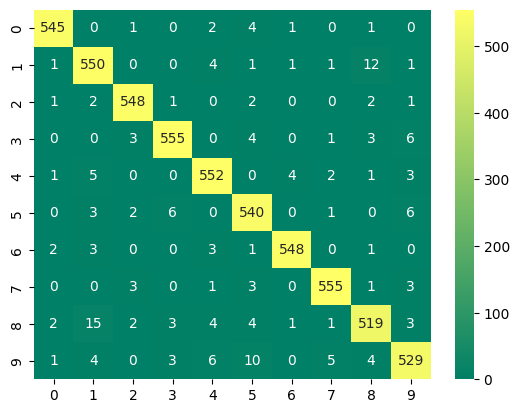

In [93]:
y_pred_kfold_log = cross_val_predict(model_regresionLogistica, X_uci, y_uci, cv=kf)

sns.heatmap(confusion_matrix(y_uci, y_pred_kfold_log), annot=True, cmap="summer", fmt='g')

In [94]:
print("Classification report: \n", classification_report(y_uci, y_pred_kfold_log))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       554
           1       0.95      0.96      0.95       571
           2       0.98      0.98      0.98       557
           3       0.98      0.97      0.97       572
           4       0.97      0.97      0.97       568
           5       0.95      0.97      0.96       558
           6       0.99      0.98      0.98       558
           7       0.98      0.98      0.98       566
           8       0.95      0.94      0.95       554
           9       0.96      0.94      0.95       562

    accuracy                           0.97      5620
   macro avg       0.97      0.97      0.97      5620
weighted avg       0.97      0.97      0.97      5620



### Comparación de modelos logísticos

In [95]:
comparativa = pd.DataFrame({
    'Nombre': ['Dataset sklearn', 'Dataset uci', 'Dataset uci cross validation'],
    'Accuracy': [round(accuracy_score(y_test, logisticaY_pred), 3), round(accuracy_score(y_uci, uciLogY_pred), 3), round(accuracy_score(y_uci, y_pred_kfold_log), 3)],
    'Precision': [round(precision_score(y_test, logisticaY_pred, average='weighted'), 3), round(precision_score(y_uci, uciLogY_pred, average='weighted'), 3), round(precision_score(y_uci, y_pred_kfold_log, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, logisticaY_pred, average="weighted"), 3), round(recall_score(y_uci, uciLogY_pred, average="weighted"), 3), round(recall_score(y_uci, y_pred_kfold_log, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, logisticaY_pred, average="weighted"), 3), round(f1_score(y_uci, uciLogY_pred, average="weighted"), 3), round(f1_score(y_uci, y_pred_kfold_log, average="weighted"), 3)],
})

comparativa.sort_values(by="Accuracy", ascending=False)

,Nombre,Accuracy,Precision,Recall,F1
0,Dataset sklearn,0.973,0.973,0.973,0.973
2,Dataset uci cross validation,0.968,0.968,0.968,0.968
1,Dataset uci,0.957,0.957,0.957,0.956


No se ven unas diferencias muy significativas. El motivo de que pueda haber dado "peores" es que, el dataset de uci difiera un poco del de sklearn, pudiendo el primero tener mayor nivel de ruido perjudique.

## **Perceptron**

### Prediccion de resultados

In [96]:
ucipercY_pred = model_perceptron.predict(X_uci)

### Restultados de modelos

<Axes: >

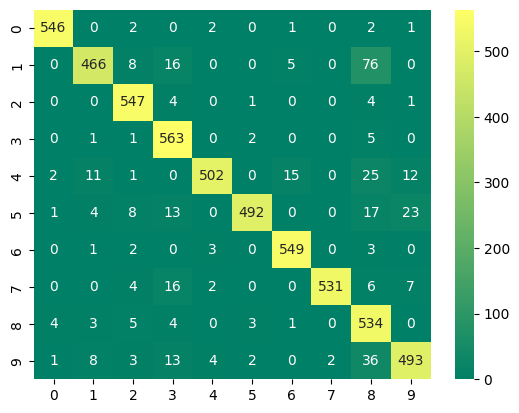

In [97]:
sns.heatmap(confusion_matrix(y_uci, ucipercY_pred), annot=True, cmap="summer", fmt='g')

In [98]:
print("Classification report: \n", classification_report(y_uci, ucipercY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       554
           1       0.94      0.82      0.88       571
           2       0.94      0.98      0.96       557
           3       0.90      0.98      0.94       572
           4       0.98      0.88      0.93       568
           5       0.98      0.88      0.93       558
           6       0.96      0.98      0.97       558
           7       1.00      0.94      0.97       566
           8       0.75      0.96      0.85       554
           9       0.92      0.88      0.90       562

    accuracy                           0.93      5620
   macro avg       0.94      0.93      0.93      5620
weighted avg       0.94      0.93      0.93      5620



### Cross-Validation

<Axes: >

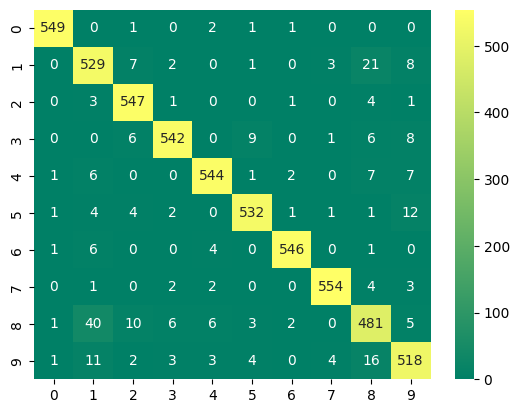

In [100]:
y_pred_kfold_perc = cross_val_predict(model_perceptron, X_uci, y_uci, cv=kf)

sns.heatmap(confusion_matrix(y_uci, y_pred_kfold_perc), annot=True, cmap="summer", fmt='g')

### Comparativa con el dataset anterior

In [101]:
comparativa = pd.DataFrame({
    'Nombre': ['Dataset sklearn', 'Dataset uci', 'Dataset uci cross validation'],
    'Accuracy': [round(accuracy_score(y_test, perc_yPred), 3), round(accuracy_score(y_uci, ucipercY_pred), 3), round(accuracy_score(y_uci, y_pred_kfold_perc), 3)],
    'Precision': [round(precision_score(y_test, perc_yPred, average='weighted'), 3), round(precision_score(y_uci, ucipercY_pred, average='weighted'), 3), round(precision_score(y_uci, y_pred_kfold_perc, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, perc_yPred, average="weighted"), 3), round(recall_score(y_uci, ucipercY_pred, average="weighted"), 3), round(recall_score(y_uci, y_pred_kfold_perc, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, perc_yPred, average="weighted"), 3), round(f1_score(y_uci, ucipercY_pred, average="weighted"), 3), round(f1_score(y_uci, y_pred_kfold_perc, average="weighted"), 3)],
})

comparativa.sort_values(by="Accuracy", ascending=False)

,Nombre,Accuracy,Precision,Recall,F1
2,Dataset uci cross validation,0.951,0.951,0.951,0.951
0,Dataset sklearn,0.948,0.954,0.948,0.949
1,Dataset uci,0.929,0.936,0.929,0.930


En este caso vemos que, aunque con el nuevo dataset, los valores de Accuracy bajan debido a, como hemos dicho antes, un posible nivel de ruido. Aún así, en esta ocasión, al hacer el cross validation, el modelo ha mejorado, incluso superando a la primera versión del modelo (con sklearn).

## **Decision Tree**

### Prediccion de resultados

In [102]:
ucidecisiontreeY_pred = model_decisionTree.predict(X_uci)

### Restultados de modelos

<Axes: >

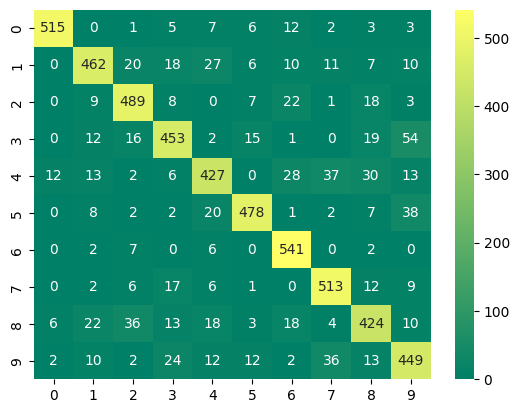

In [103]:
sns.heatmap(confusion_matrix(y_uci, ucidecisiontreeY_pred), annot=True, cmap="summer", fmt='g')

In [104]:
print("Classification report: \n", classification_report(y_uci, ucidecisiontreeY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       554
           1       0.86      0.81      0.83       571
           2       0.84      0.88      0.86       557
           3       0.83      0.79      0.81       572
           4       0.81      0.75      0.78       568
           5       0.91      0.86      0.88       558
           6       0.85      0.97      0.91       558
           7       0.85      0.91      0.88       566
           8       0.79      0.77      0.78       554
           9       0.76      0.80      0.78       562

    accuracy                           0.85      5620
   macro avg       0.85      0.85      0.85      5620
weighted avg       0.85      0.85      0.84      5620



### Cross Validation

<Axes: >

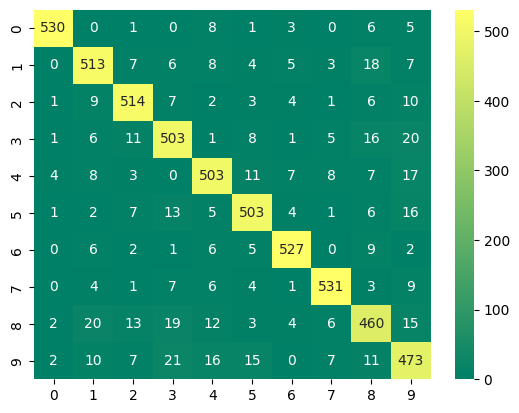

In [105]:
y_pred_kfold_dTree = cross_val_predict(model_decisionTree, X_uci, y_uci, cv=kf)

sns.heatmap(confusion_matrix(y_uci, y_pred_kfold_dTree), annot=True, cmap="summer", fmt='g')

### Comparación con el dataset anterior

In [106]:
comparativa = pd.DataFrame({
    'Nombre': ['Dataset sklearn', 'Dataset uci', 'Dataset uci cross validation'],
    'Precision': [round(precision_score(y_test, decisionTree_ypred, average='weighted'), 3), round(precision_score(y_uci, ucidecisiontreeY_pred, average='weighted'), 3), round(precision_score(y_uci, y_pred_kfold_dTree, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, decisionTree_ypred, average="weighted"), 3), round(recall_score(y_uci, ucidecisiontreeY_pred, average="weighted"), 3), round(recall_score(y_uci, y_pred_kfold_dTree, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, decisionTree_ypred, average="weighted"), 3), round(f1_score(y_uci, ucidecisiontreeY_pred, average="weighted"), 3), round(f1_score(y_uci, y_pred_kfold_dTree, average="weighted"), 3)],
    'Score': [round(accuracy_score(y_test, decisionTree_ypred), 3), round(accuracy_score(y_uci, ucidecisiontreeY_pred), 3), round(accuracy_score(y_uci, y_pred_kfold_dTree), 3)]
})

comparativa.sort_values(by="Precision", ascending=False)

,Nombre,Precision,Recall,F1,Score
2,Dataset uci cross validation,0.900,0.900,0.900,0.900
1,Dataset uci,0.846,0.845,0.845,0.845
0,Dataset sklearn,0.836,0.833,0.833,0.833


Con esta comparación, podemos observar que el dataset de uci trabaja mejor con las Decision Tree. Luego, vemos que es el modelo que mas mejora con el cross validation, teniendo un cambio mas significativo.

## **Random Forest**

### Prediccion de resultados

In [107]:
ucirandomForestY_pred = model_randomForest.predict(X_uci)

### Restultados de modelos

<Axes: >

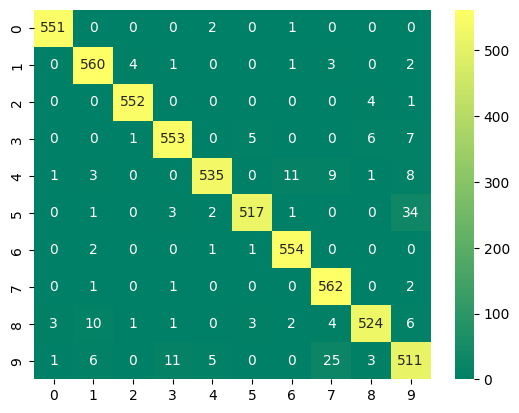

In [108]:
sns.heatmap(confusion_matrix(y_uci, ucirandomForestY_pred), annot=True, cmap="summer", fmt='g')

In [109]:
print("Classification report: \n", classification_report(y_uci, ucirandomForestY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       554
           1       0.96      0.98      0.97       571
           2       0.99      0.99      0.99       557
           3       0.97      0.97      0.97       572
           4       0.98      0.94      0.96       568
           5       0.98      0.93      0.95       558
           6       0.97      0.99      0.98       558
           7       0.93      0.99      0.96       566
           8       0.97      0.95      0.96       554
           9       0.89      0.91      0.90       562

    accuracy                           0.96      5620
   macro avg       0.96      0.96      0.96      5620
weighted avg       0.96      0.96      0.96      5620



### Cross Validation

<Axes: >

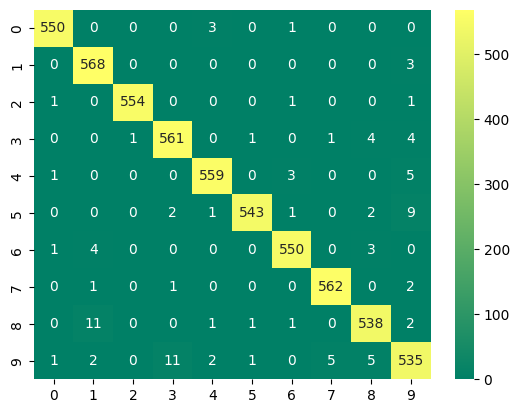

In [110]:
y_pred_kfold_random = cross_val_predict(model_randomForest, X_uci, y_uci, cv=kf)

sns.heatmap(confusion_matrix(y_uci, y_pred_kfold_random), annot=True, cmap="summer", fmt='g')

### Comparación con el dataset anterior

In [111]:
comparativa = pd.DataFrame({
    'Nombre': ['Dataset sklearn', 'Dataset uci', 'Dataset uci cross validation'],
    'Accuracy': [round(accuracy_score(y_test, randomForest_ypred), 3), round(accuracy_score(y_uci, ucirandomForestY_pred), 3), round(accuracy_score(y_uci, y_pred_kfold_random), 3)],
    'Precision': [round(precision_score(y_test, randomForest_ypred, average='weighted'), 3), round(precision_score(y_uci, ucirandomForestY_pred, average='weighted'), 3), round(precision_score(y_uci, y_pred_kfold_random, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, randomForest_ypred, average="weighted"), 3), round(recall_score(y_uci, ucirandomForestY_pred, average="weighted"), 3), round(recall_score(y_uci, y_pred_kfold_random, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, randomForest_ypred, average="weighted"), 3), round(f1_score(y_uci, ucirandomForestY_pred, average="weighted"), 3), round(f1_score(y_uci, y_pred_kfold_random, average="weighted"), 3)],
})

comparativa.sort_values(by="Accuracy", ascending=False)

,Nombre,Accuracy,Precision,Recall,F1
2,Dataset uci cross validation,0.982,0.982,0.982,0.982
0,Dataset sklearn,0.975,0.975,0.975,0.975
1,Dataset uci,0.964,0.965,0.964,0.964


Como en la regresión logística, en este modelo observamos que reentrenando con el dataset de uci, vemos bajar un poco el Accuracy del modelo, pero luego este mejora gracias al cross-validation